# GOOG vs AMZN 
### Entry Threshold:	2.00 | Exit Threshold:	0.30 | Max Duration:	20 | 
### MA Period:	30	MA Type:	EMA	| StdDev Period:	30 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels
from pandas_datareader import data
import datetime
import quandl

In [2]:
start= datetime.datetime(2017, 1, 1)  # The start of the year for example
end= datetime.datetime(2020, 9, 30)

In [3]:
ticker_1 = "GOOG"
ticker_2 = "AMZN"

In [4]:
df_tickr1 = data.DataReader(name= ticker_1, data_source= "yahoo", start= start, end= end)
df_tickr2 = data.DataReader(name= ticker_2, data_source= "yahoo", start= start, end= end)

In [5]:
df_tickr1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-26,1314.800049,1305.089966,1309.859985,1313.550049,1069700,1313.550049
2019-11-27,1318.359985,1309.630005,1315.000000,1312.989990,995600,1312.989990
2019-11-29,1310.204956,1303.969971,1307.119995,1304.959961,587000,1304.959961
2019-12-02,1305.829956,1281.000000,1301.000000,1289.920044,1510900,1289.920044
2019-12-03,1298.461060,1279.000000,1279.569946,1295.280029,1114334,1295.280029


In [6]:
df_tickr2.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-26,1797.030029,1778.349976,1779.920044,1796.939941,3181200,1796.939941
2019-11-27,1824.500000,1797.310059,1801.000000,1818.510010,3025600,1818.510010
2019-11-29,1824.689941,1800.790039,1817.780029,1800.800049,1923400,1800.800049
2019-12-02,1805.550049,1762.680054,1804.400024,1781.599976,3925600,1781.599976
2019-12-03,1772.869995,1747.390015,1760.000000,1769.959961,3350282,1769.959961


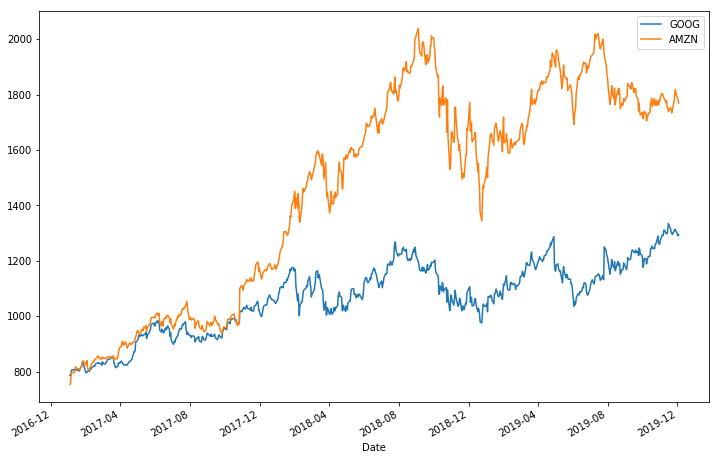

In [7]:
df_tickr1['Adj Close'].plot(label='{}'.format(ticker_1),figsize=(12,8))
df_tickr2['Adj Close'].plot(label='{}'.format(ticker_2))
plt.legend();

In [8]:
spread_ratio = df_tickr1['Adj Close']/df_tickr2['Adj Close']

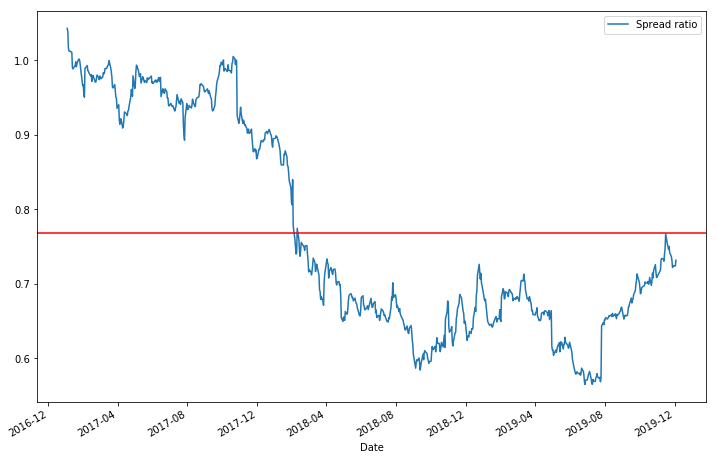

In [9]:
spread_ratio.plot(label='Spread ratio',figsize=(12,8))
plt.axhline(spread_ratio.mean(),c='r')
plt.legend();

In [10]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

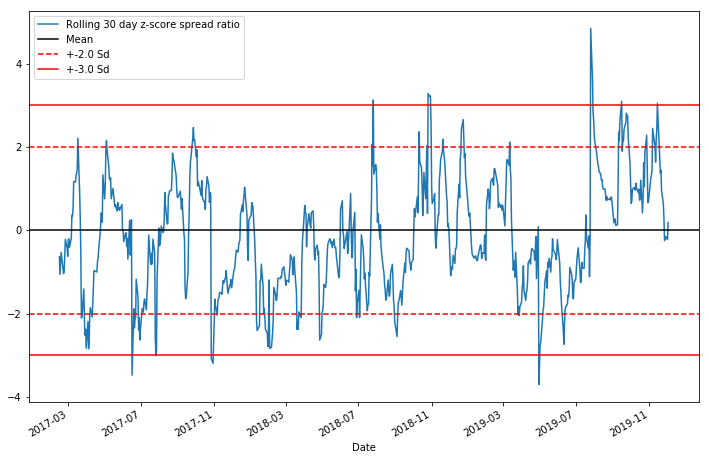

In [11]:
#1 day moving average of the price spread
spreadratio_mavg1 = spread_ratio.rolling(1).mean()

# 30 day moving average of the price spread
spreadratio_mavg30 = spread_ratio.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30ratio = spread_ratio.rolling(30).std()

# Compute the z score for each day
zscore_30_1_ratio = (spreadratio_mavg1 - spreadratio_mavg30)/std_30ratio



zscore_30_1_ratio.plot(figsize=(12,8),label='Rolling 30 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(3.0, color='red', linestyle='-')
plt.axhline(-3.0, color='red', linestyle='-')
plt.axhline(-2.0, color='red',linestyle='--')
plt.legend(['Rolling 30 day z-score spread ratio', 'Mean', '+-2.0 Sd', '+-3.0 Sd']);

In [12]:
from statsmodels.tsa.stattools import coint

In [13]:
y0 = df_tickr1['Adj Close']
y1 = df_tickr2['Adj Close']

In [14]:
t_stat_summary = statsmodels.tsa.stattools.coint(y0, y1, autolag='aic', return_results=True) 

In [15]:
print('\n--------Engel-Granger Co-Integration Test-----------\n')
print('T-stat for the pair {} VS {}:'.format(ticker_1,ticker_2), t_stat_summary[0])
print('Alpha value for the T-stat:  {}'.format(t_stat_summary[1]))
print('\n--------------------------------------\n')
print('T-stat 99%:  {}'.format(t_stat_summary[2][0]))
print('T-stat 95%:  {}'.format(t_stat_summary[2][1]))
print('T-stat 90%:  {}'.format(t_stat_summary[2][2]))


--------Engel-Granger Co-Integration Test-----------

T-stat for the pair GOOG VS AMZN: -1.8462684471591497
Alpha value for the T-stat:  0.6069879952500495

--------------------------------------

T-stat 99%:  -3.9114230750840826
T-stat 95%:  -3.3444670512810992
T-stat 90%:  -3.050233250302549


In [16]:
from statsmodels.tsa.stattools import adfuller
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('\n-----------Augmented Dickey-Fuller Test: ----------\n')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("\nstrong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary\n")
    else:
        print("\nWeak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary\n ")
    
    print("Dickey Fuller Confidence Intervals:  ", adfuller(spread_ratio)[4])

adf_check(spread_ratio)


-----------Augmented Dickey-Fuller Test: ----------

ADF Test Statistic : -1.8870569060636841
p-value : 0.33817423315570394
#Lags Used : 0
Number of Observations Used : 734

Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary
 
Dickey Fuller Confidence Intervals:   {'1%': -3.439290485895927, '5%': -2.8654856985173414, '10%': -2.568871126669587}


In [17]:
np.corrcoef(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[1.        , 0.89451824],
       [0.89451824, 1.        ]])

In [18]:
np.cov(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[ 16845.53133409,  44821.41348357],
       [ 44821.41348357, 149041.76306688]])

In [19]:
zscore_30_1_ratio[-20:]

Date
2019-11-05    1.323766
2019-11-06    1.458935
2019-11-07    2.447446
2019-11-08    2.334179
2019-11-11    2.006719
2019-11-12    1.638128
2019-11-13    2.182853
2019-11-14    2.401633
2019-11-15    3.049050
2019-11-18    2.012010
2019-11-19    1.688472
2019-11-20    1.371512
2019-11-21    1.449667
2019-11-22    0.959664
2019-11-25    0.629750
2019-11-26    0.287324
2019-11-27   -0.248677
2019-11-29   -0.149989
2019-12-02   -0.221228
2019-12-03    0.185968
Name: Adj Close, dtype: float64

In [20]:
spread_ratio[-20:]

Date
2019-11-05    0.717113
2019-11-06    0.719357
2019-11-07    0.731943
2019-11-08    0.734299
2019-11-11    0.733322
2019-11-12    0.730484
2019-11-13    0.740398
2019-11-14    0.747441
2019-11-15    0.767392
2019-11-18    0.753596
2019-11-19    0.750495
2019-11-20    0.746507
2019-11-21    0.750183
2019-11-22    0.742009
2019-11-25    0.736645
2019-11-26    0.730993
2019-11-27    0.722014
2019-11-29    0.724656
2019-12-02    0.724023
2019-12-03    0.731813
Name: Adj Close, dtype: float64

In [21]:
#differenced spread
t_series_lag_1 = spread_ratio.diff(1)


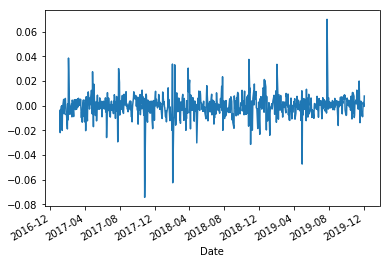

In [22]:
#plot the differenced spread
t_series_lag_1.plot()

In [23]:
#statsmodels.tsa.stattools.adfuller()

In [24]:
spreadratio_ewmamavg30 = spread_ratio.ewm(30).mean()

##  vgt top holdings : ADBE; intel; cisco; apple; - co-integrated